In [33]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('../data/results_2223_with_gw.csv')

data['score_difference'] = data['home_score'] - data['away_score']

# Selecting relevant columns for prediction
selected_features = ['home_score', 'away_score', 'gameweek']
target = 'score_difference'  # Assuming you have a column for the target variable 'score_difference'

# Preprocessing data
X = data[selected_features]
y = data[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Convert data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train.astype(np.float32).values)
y_train_tensor = torch.from_numpy(y_train.astype(np.float32).values)
X_test_tensor = torch.from_numpy(X_test.astype(np.float32).values)
y_test_tensor = torch.from_numpy(y_test.astype(np.float32).values)


# Define the neural network architecture for regression
class FootballScorePredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FootballScorePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


# Initialize the model, define loss function and optimizer for regression
input_size = len(selected_features)  # Update with the number of features
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 1  # Output size for regression (predicting score difference)
model = FootballScorePredictor(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training the model
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

c:\Users\Bill\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([304])) that is different to the input size (torch.Size([304, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1000/10000], Loss: 3.570557
Epoch [2000/10000], Loss: 3.570552
Epoch [3000/10000], Loss: 3.570604
Epoch [4000/10000], Loss: 3.570562
Epoch [5000/10000], Loss: 3.572500
Epoch [6000/10000], Loss: 3.570540
Epoch [7000/10000], Loss: 3.571038
Epoch [8000/10000], Loss: 3.570540
Epoch [9000/10000], Loss: 3.570540
Epoch [10000/10000], Loss: 3.570540


C:\Users\Bill\AppData\Local\Temp\ipykernel_8356\2804257024.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # You can change the colormap here


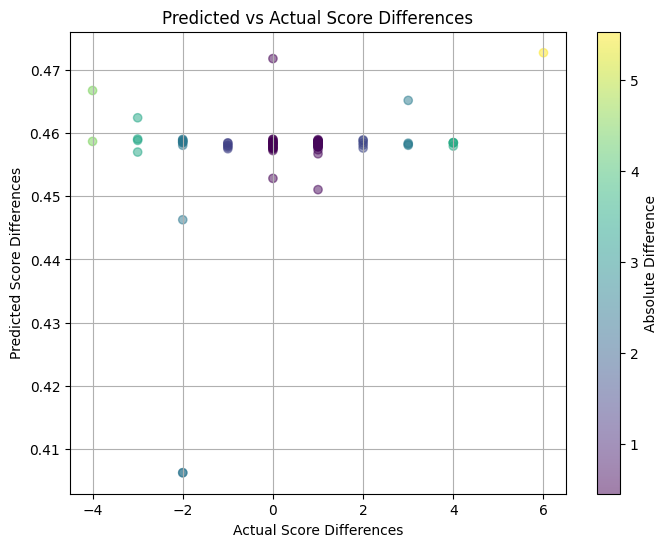

In [37]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Inside the evaluation section
with torch.no_grad():
    outputs = model(X_test_tensor)
    outputs = outputs.squeeze().numpy()  # Convert predictions to NumPy array
    y_test_np = y_test_tensor.numpy()  # Convert actual scores to NumPy array

    # Calculate absolute differences for color coding
    absolute_diff = abs(y_test_np - outputs)

    # Create a scatter plot with different colors based on score differences
    plt.figure(figsize=(8, 6))
    norm = Normalize(vmin=absolute_diff.min(), vmax=absolute_diff.max())
    cmap = plt.cm.get_cmap('viridis')  # You can change the colormap here
    plt.scatter(y_test_np, outputs, c=absolute_diff, cmap=cmap, alpha=0.5, norm=norm)
    plt.colorbar(label='Absolute Difference')
    
    plt.title('Predicted vs Actual Score Differences')
    plt.xlabel('Actual Score Differences')
    plt.ylabel('Predicted Score Differences')
    plt.grid(True)
    plt.show()
